In [2]:
import copt
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import time
import torch

In [41]:
problem = copt.getProblem(8)

In [42]:
# problem = problem[:2]
problem

[(512, 525, 1544, 451),
 (486, 546, 1535, 535),
 (471, 505, 1464, 471),
 (529, 494, 1541, 486),
 (531, 550, 1498, 519),
 (524, 454, 1506, 488),
 (455, 460, 1462, 547),
 (496, 466, 1450, 506)]

In [43]:
order = np.arange(len(problem))
order = order.tolist()
order

[0, 1, 2, 3, 4, 5, 6, 7]

In [44]:
eval = copt.evaluate(problem, order)
eval

{'order': [0, 1, 2, 3, 4, 5, 6, 7],
 'success': 0,
 'nRouted': 1,
 'measure': 1112.4507934888325,
 'pathData': [[(512, 525),
   (528, 509),
   (535, 509),
   (544, 500),
   (1435, 500),
   (1435, 512),
   (1444, 521),
   (1456, 521),
   (1465, 512),
   (1465, 500),
   (1495, 500),
   (1496, 499),
   (1500, 503),
   (1512, 503),
   (1521, 494),
   (1521, 482),
   (1517, 478),
   (1544, 451)]],
 'failedConnections': [(486, 546, 1535, 535),
  (471, 505, 1464, 471),
  (529, 494, 1541, 486),
  (531, 550, 1498, 519),
  (524, 454, 1506, 488),
  (455, 460, 1462, 547),
  (496, 466, 1450, 506)]}

{'failedConnections': [],
 'measure': 3151.457936163769,
 'nRouted': 3,
 'order': [0, 1, 2],
 'pathData': [[(512, 525), (532, 505), (1490, 505), (1544, 451)],
              [(486, 546),
               (499, 533),
               (506, 540),
               (518, 540),
               (538, 520),
               (1496, 520),
               (1508, 508),
               (1535, 535)],
              [(471, 505), (511, 505), (526, 490), (1445, 490), (1464, 471)]],
 'success': 1}


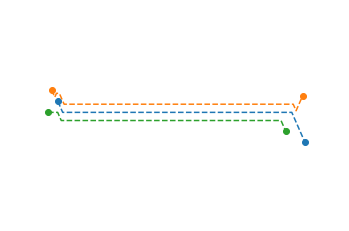

In [68]:
n = 3
test_prob = problem[:n]
test_eval = copt.evaluate(test_prob, order[:n])
pprint(test_eval)
plot_solution(test_eval)

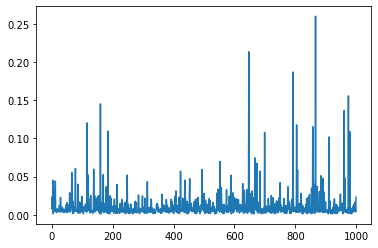

In [74]:
time_plt = []
for i in range(1000):
    
    problem = copt.getProblem(8)
    start_time = time.time()
    order = np.arange(len(problem))
    order = order.tolist()
    copt.evaluate(problem, order)
    time_plt.append(time.time() - start_time)
plt.plot(time_plt)

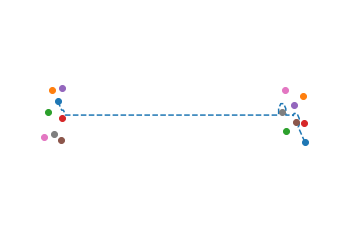

In [55]:
def plot_solution(solution):
    paths = solution['pathData']
    fig, ax = plt.subplots()
    for path in paths:
        x, y = zip(*path)
        
        color = next(ax._get_lines.prop_cycler)['color']
        ax.plot(x,y,'--', color=color)
        ax.plot([x[0], x[-1]], [y[0], y[-1]], 'o',
                color=color)
        
    fail = solution['failedConnections']
    for point_pair in fail:
        color = next(ax._get_lines.prop_cycler)['color']
        ax.plot((point_pair[0], point_pair[2]), (point_pair[1], point_pair[3]), 'o', color=color)
        # break
    
    ax.set_xlim([300,1700])
    ax.set_ylim([300,700])
    ax.axis('off')
    
    # fig.savefig('aaa', dpi=300)
    
        
plot_solution(eval)

In [15]:
x_raw = np.arange(12).reshape(3,-1).tolist()
x_torch = torch.tensor(x_raw)
x_torch.size()

torch.Size([3, 4])

In [21]:
dataset = torch.FloatTensor(5, 10, 2).uniform_(0, 1)

In [23]:
for x in dataset:
    print(x.size())

torch.Size([10, 2])
torch.Size([10, 2])
torch.Size([10, 2])
torch.Size([10, 2])
torch.Size([10, 2])
